In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:/New folder/Python/bestsellers with categories.csv")

#### DATA EXPLORATION

In [3]:
df.head(15)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [4]:
df.shape

(550, 7)

As we can readily see in first 15 rows that there are duplicate values with same user ratings,reviews count,price but for different years. This doesn't seem right to me so I will just drop all the rows with duplicate book names.


In [5]:
#DATA CLEANING
df_new=df.drop_duplicates(subset=['Name'])
df_new 

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
538,Winter of the World: Book Two of the Century T...,Ken Follett,4.5,10760,15,2012,Fiction
539,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,1302,11,2010,Non Fiction
540,Wonder,R. J. Palacio,4.8,21625,9,2013,Fiction
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction


In [6]:
df_new.shape

(351, 7)

Check for null values

In [7]:
df_new.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [8]:
df_new.describe()

,User Rating,Reviews,Price,Year
count,351.000000,351.000000,351.000000,351.00000
mean,4.608832,9799.683761,13.076923,2013.51567
std,0.226669,10871.356548,10.050860,3.28271
min,3.300000,37.000000,0.000000,2009.00000
25%,4.500000,3442.500000,8.000000,2010.00000
50%,4.600000,6346.000000,12.000000,2013.00000
75%,4.800000,11470.500000,16.000000,2016.00000
max,4.900000,87841.000000,105.000000,2019.00000


In [9]:
df_new.nunique()

Name           351
Author         248
User Rating     14
Reviews        345
Price           40
Year            11
Genre            2
dtype: int64

In [10]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 0 to 546
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         351 non-null    object 
 1   Author       351 non-null    object 
 2   User Rating  351 non-null    float64
 3   Reviews      351 non-null    int64  
 4   Price        351 non-null    int64  
 5   Year         351 non-null    int64  
 6   Genre        351 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 21.9+ KB


#### DATA VISUALIZATION

Text(0.5, 1.0, 'Distribution of User Rating Year-Wise')

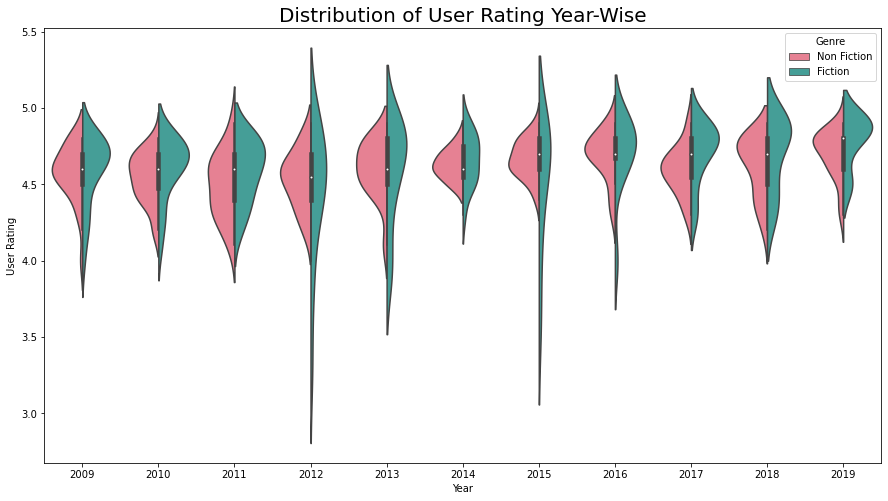

In [11]:
plt.figure(figsize=(15,8))
ax = sns.violinplot(x="Year", y="User Rating", hue="Genre", split=True, data=df_new,palette='husl')
ax.set_title('Distribution of User Rating Year-Wise', fontsize=20)

##### Both the genres received ratings ranging from 4 to 5 during all the years (2009-2019). This clearly shows that readers got good reads in both genres throughout.

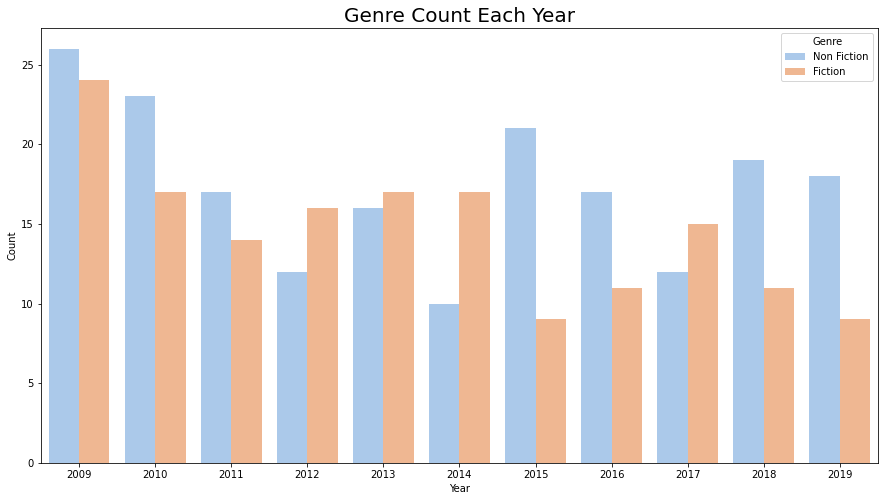

In [13]:
df_1 = df_new[["Genre","Year"]].value_counts().reset_index()
df_1.columns = ["Genre","Year","Count"]
plt.figure(figsize=(15,8))
sns.barplot(hue=df_1["Genre"], x=df_1["Year"], y=df_1["Count"], palette='pastel')
plt.title("Genre Count Each Year",fontsize=20)
plt.show()

##### Non fiction had greater number of bestsellers than fiction during 7 years (2009-11,2015-16,2018-19).

In [15]:
df_2 = df_new.groupby(['Year']).mean()['User Rating']

Text(0.5, 1.0, 'Mean User Rating Each Year')

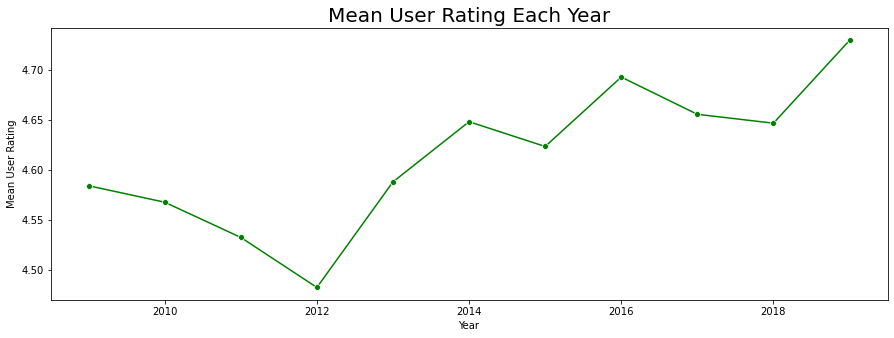

In [18]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df_2, color='green', marker='o')
plt.ylabel('Mean User Rating')
plt.title('Mean User Rating Each Year',fontsize=20)

##### 2012 recorded lowest mean user rating while 2019 recorded highest mean user rating.

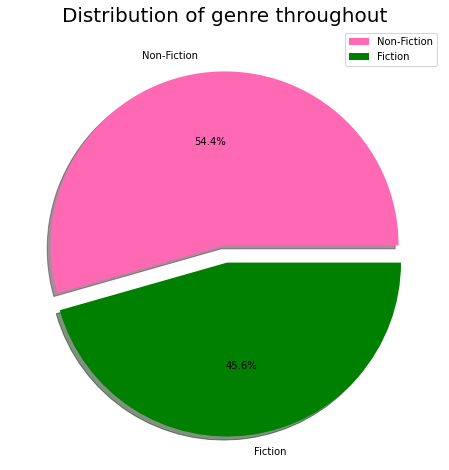

In [21]:
plt.figure(figsize=(15,8))
plt.pie(df_new['Genre'].value_counts(), explode=(0,0.1), labels=['Non-Fiction', 'Fiction'], autopct='%1.1f%%', shadow=True, colors=['hotpink','green'])
plt.title('Distribution of genre throughout',fontsize=20)
plt.legend()
plt.show()

##### Overall non fiction bestsellers outnumbered fiction bestsellers during 2009-19.

Text(0.5, 1.0, 'Mean Book Prices Each Year')

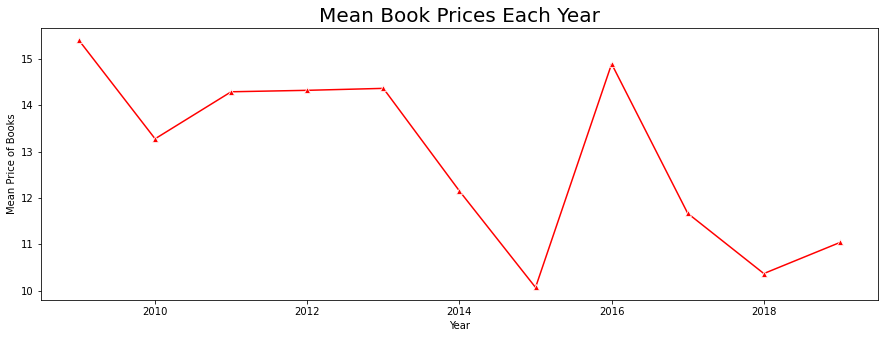

In [23]:
df_3 = df_new.groupby(['Year']).mean()['Price']
plt.figure(figsize=(15,5))
sns.lineplot(data=df_3,color='red',marker='^')
plt.ylabel('Mean Price of Books')
plt.title('Mean Book Prices Each Year',fontsize=20)

##### 2015 recorded lowest mean book price while 2009 recorded highest mean book price.

### For books with maximum prices & authors with maximum number of bestsellers

In [24]:
max_bookprices = df_new.groupby('Name', as_index = False)['Price'].mean().sort_values('Price',ascending=False).head(5)
max_bookprices

,Name,Price
56,Diagnostic and Statistical Manual of Mental Di...,105
307,The Twilight Saga Collection,82
112,Hamilton: The Revolution,54
228,The Book of Basketball: The NBA According to T...,53
115,Harry Potter Paperback Box Set (Books 1-7),52


##### Diagnostic and Statistical Manual of Mental Disorders, 5th Edition: DSM-5 is the most expensive book.

In [25]:
Authors_with_max_bestsellers = df_new["Author"].value_counts().sort_values(ascending=False).reset_index().head()
Authors_with_max_bestsellers.columns =['Author', 'No. of Bestsellers']

In [26]:
Authors_with_max_bestsellers

,Author,No. of Bestsellers
0,Jeff Kinney,12
1,Rick Riordan,10
2,Stephenie Meyer,7
3,J.K. Rowling,6
4,Bill O'Reilly,6


##### Jeff Kinney with 12 bestsellers is the author with maximum bestsellers.

### Thankyou!